In [12]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import imageio as io

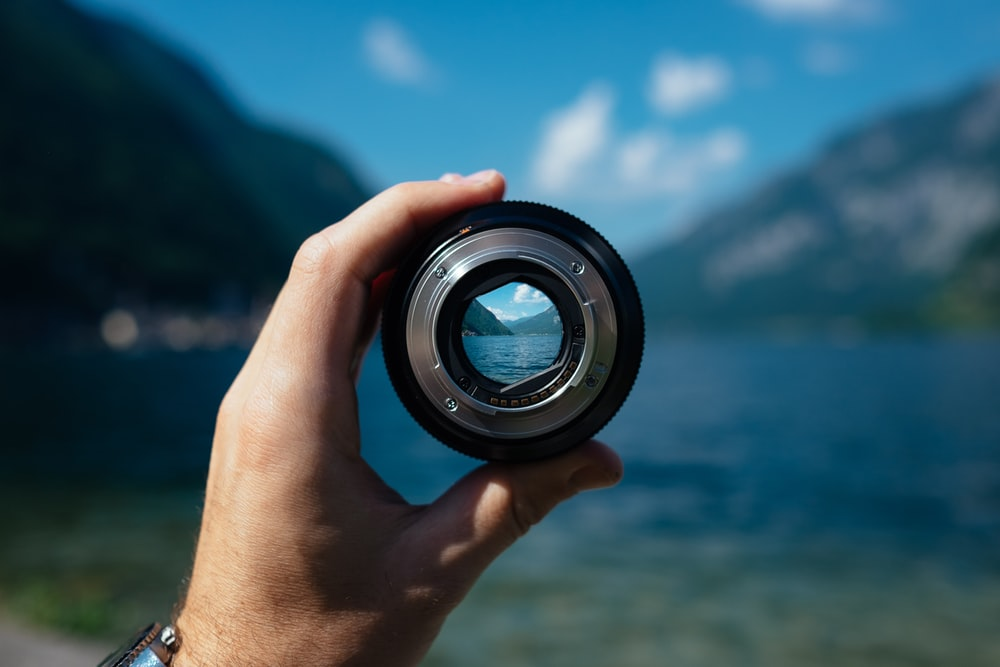

In [ ]:
img = cv2.imread('drive/MyDrive/test_image.jpg')
cv2_imshow(img)

In [ ]:
clean = io.imread('drive/MyDrive/test_image.jpg')
#cv2_imshow(clean)
clean.shape
#img.shape


(667, 1000, 3)

In [ ]:
print(clean[56][12])
print(img[56][12])

[ 3 23 32]
[32 23  3]


In [ ]:
array = np.load('1.npy')
transposed = np.ascontiguousarray(array.transpose((2, 0, 1)))
print(transposed.shape)
cv2_imshow(transposed)

(3, 512, 768)


## Generate additive Gaussian noise image

In [ ]:
def add_gaussian(img, sd):

  # Scale parameter is standard deviation, generate noise
  noise = np.random.normal(size=img.shape, scale=sd/255) * 255

  # Apply noise
  img = img + noise

  # Round to integers
  img = np.rint(img)

  # Set values below 0 to 0, and values above 255 to 255.
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for k in range(img.shape[2]):
        if img[i][j][k] < 0:
          img[i][j][k] = 0
        if img[i][j][k] > 255:
          img[i][j][k] = 255

  return img

In [13]:
def add_gaussian_grey(img, sd):

  # Scale parameter is standard deviation, generate noise
  noise = np.random.normal(size=img.shape, scale=sd/255) * 255

  # Apply noise
  img = img + noise

  # Round to integers
  img = np.rint(img)

  # Set values below 0 to 0, and values above 255 to 255.
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] < 0:
        img[i][j] = 0
      if img[i][j] > 255:
        img[i][j] = 255

  return img

In [ ]:
noisy_image = add_gaussian(img, 25)
cv2_imshow(noisy_image)

Output hidden; open in https://colab.research.google.com to view.

## Generate Poisson noise image

In [ ]:
def add_poisson(img, zeta):

  # Normalise values between 0 and 1
  img = img / 255

  # Apply poisson noise
  img = np.random.poisson(img/zeta) * zeta

  # Scale back to 0 and 255
  img = img * 255

  # Round to integers
  img = np.rint(img)

  # Set values below 0 to 0, and values above 255 to 255.
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for k in range(img.shape[2]):
        if img[i][j][k] < 0:
          img[i][j][k] = 0
        if img[i][j][k] > 255:
          img[i][j][k] = 255

  return img

In [14]:
def add_poisson_grey(img, zeta):

  # Normalise values between 0 and 1
  img = img / 255

  # Apply poisson noise
  img = np.random.poisson(img/zeta) * zeta

  # Scale back to 0 and 255
  img = img * 255

  # Round to integers
  img = np.rint(img)

  # Set values below 0 to 0, and values above 255 to 255.
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] < 0:
        img[i][j] = 0
      if img[i][j] > 255:
        img[i][j] = 255

  return img

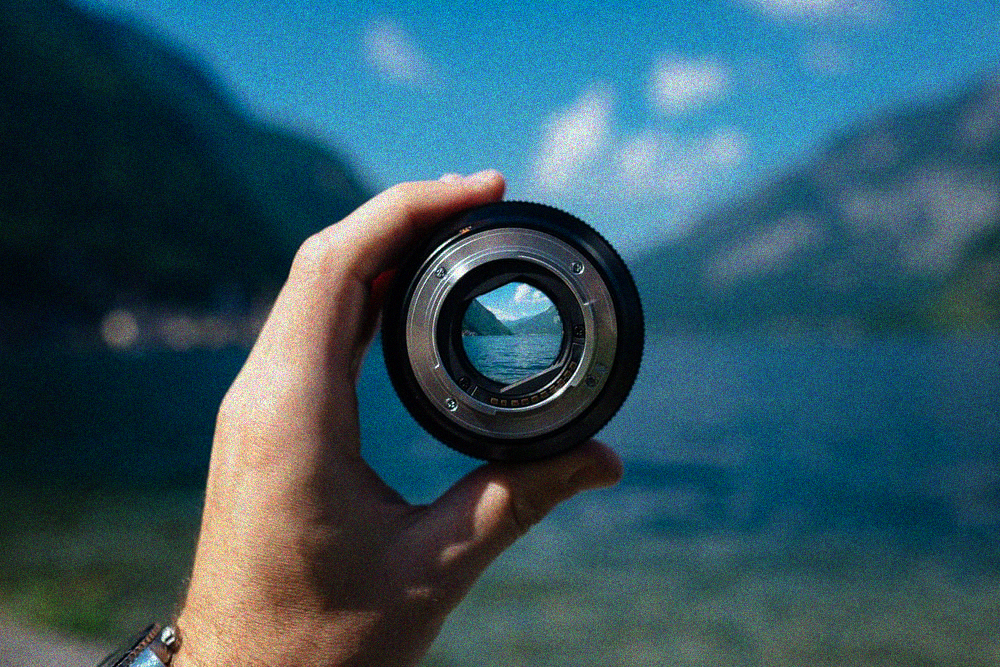

In [ ]:
noisy_image = add_poisson(img, 0.01)
cv2_imshow(noisy_image)

## Generate Gamma noise image

In [ ]:
def add_gamma(img, k):

  # Apply noise
  img = img * np.random.gamma(k, 1/k, img.shape)

  # Round to integers
  img = np.rint(img)

  # Set values below 0 to 0, and values above 255 to 255.
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for k in range(img.shape[2]):
        if img[i][j][k] < 0:
          img[i][j][k] = 0
        if img[i][j][k] > 255:
          img[i][j][k] = 255

  return img

In [15]:
def add_gamma_grey(img, k):

  # Apply noise
  img = img * np.random.gamma(k, 1/k, img.shape)

  # Round to integers
  img = np.rint(img)

  # Set values below 0 to 0, and values above 255 to 255.
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] < 0:
        img[i][j] = 0
      if img[i][j] > 255:
        img[i][j] = 255

  return img

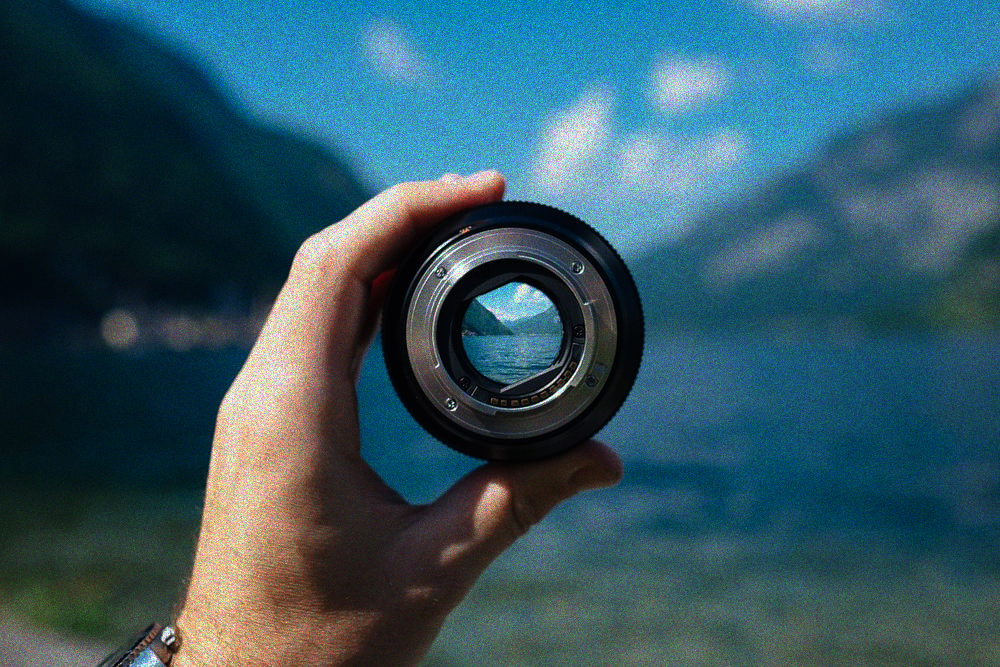

In [ ]:
noisy_image = add_gamma(img, 50)
cv2_imshow(noisy_image)

## Generate Set12 noisy images

In [ ]:
# Convert clean to npy

for filename in os.listdir('drive/MyDrive/Deep Learning Datasets/Clean Datasets/Set12/'):
  filepath = 'drive/MyDrive/Deep Learning Datasets/Clean Datasets/Set12/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  np.save('clean/' + img_name, img_in / 255)


In [16]:
import os

In [ ]:
# Load set12 images into dict
set12_images = {}

for filename in os.listdir('set12/'):
  filepath = 'set12/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  set12_images[img_name] = img_in

In [ ]:
for key, value in set12_images.items():

  # Added in the / 255 bit
  
  # Apply noise and save

  np.save('noisy_25/' + key + '.npy', add_gaussian_grey(value, 25) / 255)
  np.save('noisy_50/' + key + '.npy', add_gaussian_grey(value, 50) / 255)

  np.save('noisy_0.01/' + key + '.npy', add_poisson_grey(value, 0.01) / 255)
  np.save('noisy_0.05/' + key + '.npy', add_poisson_grey(value, 0.05) / 255)

  np.save('noisy_g_100/' + key + '.npy', add_gamma_grey(value, 100) / 255)
  np.save('noisy_g_50/' + key + '.npy', add_gamma_grey(value, 50) / 255)

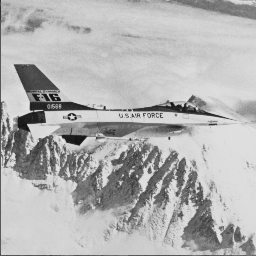

In [ ]:
test = np.load('clean/06.npy')
cv2_imshow(test * 255)

## Generate Kodak noisy images

In [ ]:
# Convert clean to npy

for filename in os.listdir('drive/MyDrive/Deep Learning Datasets/Clean Datasets/Kodak/'):
  filepath = 'drive/MyDrive/Deep Learning Datasets/Clean Datasets/Kodak/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_COLOR)
  np.save('clean/' + img_name, img_in)

In [17]:
# Load kodak images into dict
kodak_images = {}

for filename in os.listdir('kodak/'):
  filepath = 'kodak/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_COLOR)
  kodak_images[img_name] = img_in

FileNotFoundError: ignored

In [ ]:
for key, value in kodak_images.items():

  # Apply noise and save

  np.save('kodak_gaussian_25/' + key + '.npy', add_gaussian(value, 25))
  np.save('kodak_gaussian_50/' + key + '.npy', add_gaussian(value, 50))

  np.save('kodak_poisson_0.01/' + key + '.npy', add_poisson(value, 0.01))
  np.save('kodak_poisson_0.05/' + key + '.npy', add_poisson(value, 0.05))

  np.save('kodak_gamma_100/' + key + '.npy', add_gamma(value, 100))
  np.save('kodak_gamma_50/' + key + '.npy', add_gamma(value, 50))

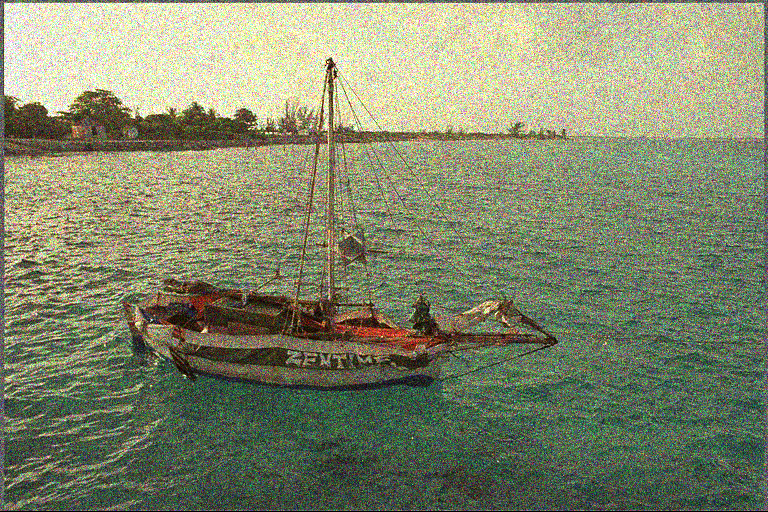

In [ ]:
test = np.load('kodak_poisson_0.05/6.npy')
cv2_imshow(test)

## Generate CBSD68 noisy images

In [ ]:
# Convert clean to npy

for filename in os.listdir('drive/MyDrive/Deep Learning Datasets/Clean Datasets/CBSD68/'):
  filepath = 'drive/MyDrive/Deep Learning Datasets/Clean Datasets/CBSD68/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_COLOR)
  np.save('clean/' + img_name, img_in)

In [ ]:
# Load cbsd68 images into dict
cbsd68_images = {}

for filename in os.listdir('cbsd68/'):
  filepath = 'cbsd68/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_COLOR)
  cbsd68_images[img_name] = img_in

In [ ]:
for key, value in cbsd68_images.items():

  # Apply noise and save

  np.save('cbsd68_gaussian_25/' + key + '.npy', add_gaussian(value, 25))
  np.save('cbsd68_gaussian_50/' + key + '.npy', add_gaussian(value, 50))

  np.save('cbsd68_poisson_0.01/' + key + '.npy', add_poisson(value, 0.01))
  np.save('cbsd68_poisson_0.05/' + key + '.npy', add_poisson(value, 0.05))

  np.save('cbsd68_gamma_100/' + key + '.npy', add_gamma(value, 100))
  np.save('cbsd68_gamma_50/' + key + '.npy', add_gamma(value, 50))

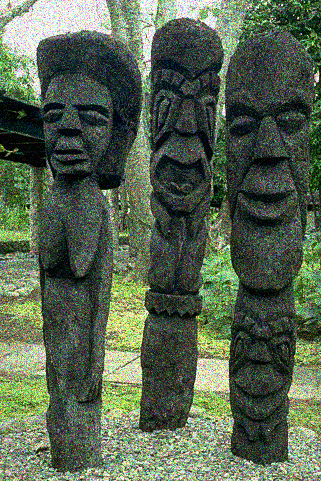

In [ ]:
test = np.load('cbsd68_poisson_0.05/101085.npy')
cv2_imshow(test)

## Generate BSD68 noisy images

In [22]:
# Convert clean to npy

for filename in os.listdir('drive/MyDrive/Deep Learning Datasets/Clean Datasets/CBSD68/'):
  filepath = 'drive/MyDrive/Deep Learning Datasets/Clean Datasets/CBSD68/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  # Need to get size down to 480 320 instead of 481 by 321
  img_remove_row = np.delete(img_in, 0, 0)
  img_remove_col = np.delete(img_remove_row, 0, 1)
  np.save('clean/' + img_name, img_remove_col / 255)

In [18]:
# Load bsd68 images into dict
bsd68_images = {}

# for filename in os.listdir('cbsd68/'):
#   filepath = 'cbsd68/' + filename
for filename in os.listdir('drive/MyDrive/Deep Learning Datasets/Clean Datasets/CBSD68/'):
  filepath = 'drive/MyDrive/Deep Learning Datasets/Clean Datasets/CBSD68/' + filename
  img_name = filename.split(".")[0]
  img_in = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  # Need to get size down to 480 320 instead of 481 by 321
  img_remove_row = np.delete(img_in, 0, 0)
  img_remove_col = np.delete(img_remove_row, 0, 1)
  bsd68_images[img_name] = img_remove_col

In [19]:
for key, value in bsd68_images.items():

  # Apply noise and save

  np.save('noisy_25/' + key + '.npy', add_gaussian_grey(value, 25) / 255)
  np.save('noisy_50/' + key + '.npy', add_gaussian_grey(value, 50) / 255)

  np.save('noisy_0.01/' + key + '.npy', add_poisson_grey(value, 0.01) / 255)
  np.save('noisy_0.05/' + key + '.npy', add_poisson_grey(value, 0.05) / 255)

  np.save('noisy_g_100/' + key + '.npy', add_gamma_grey(value, 100) / 255)
  np.save('noisy_g_50/' + key + '.npy', add_gamma_grey(value, 50) / 255)

(480, 320)


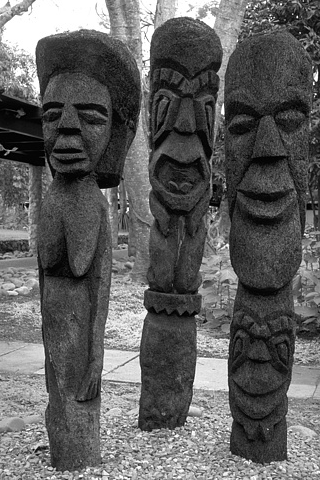

In [23]:
test = np.load('clean/101085.npy')
print(test.shape)
cv2_imshow(test * 255)

## Other code

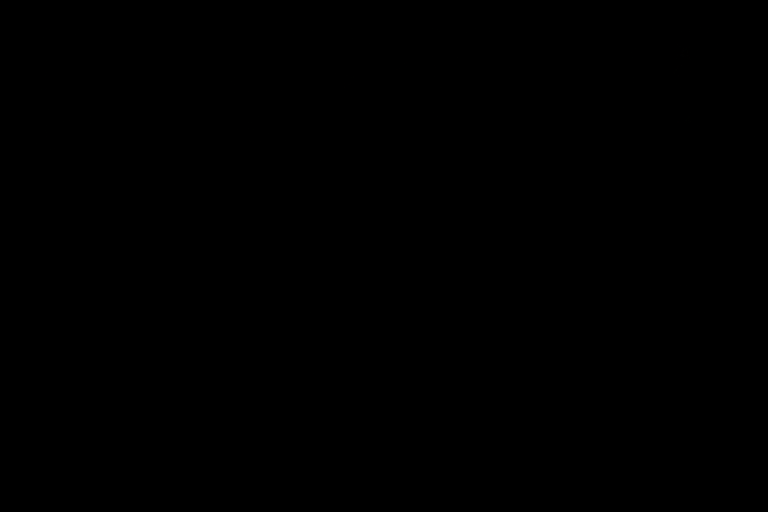

In [ ]:
noisy = (np.load('1.npy')) / 255
cv2_imshow(noisy)
np.save('drive/MyDrive/111.npy', noisy)